# Base Analysis of RTR Data

## Load Data from MongoDB

In [1]:
import pandas as pd 
import pymongo 
import yaml
import re

In [17]:
# Load data from MongoDB
# Import cred from yaml
with open("/Users/samivanecky/git/running-shoe-app/mongo_creds.yaml") as f:
    creds = yaml.safe_load(f)

# Connect to mongo
connection_str = "mongodb+srv://trackrabbit:" + str(creds['pwd']) + "@running-shoes.ncb9yfc.mongodb.net/?retryWrites=true&w=majority"
# Connect to MongoDB
client = pymongo.MongoClient(connection_str)
# Connvect to database
db = client["running-shoes"]
# Connect to collection
collection = db["roadtrailrun"]

In [85]:
# Load txt file of stop words
with open("/Users/samivanecky/git/running-shoe-app/resources/stop_words_expanded.txt") as f:
    stop_words = f.read()
# Remove new lines & convert to list
stop_words = re.sub('\n', ' ', stop_words).split()

with open("/Users/samivanecky/git/running-shoe-app/resources/remove_words.txt") as f:
    remove_words = f.read()
# Remove new lines & convert to list
remove_words = re.sub('\n', ' ', remove_words).split()

In [4]:
docs = collection.find()
df = pd.DataFrame(list(docs))

In [40]:
temp = df[df['name'].str.contains('Brooks Catamount 2')]

In [41]:
txt = temp['review_txt'].iloc[0]

## Sample Text Analysis

In [80]:
from nltk.util import ngrams, bigrams, trigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter

corpus_stop = stop_words = set(stopwords.words('english'))

In [8]:
# Get punctuation
punct = list(string.punctuation)

In [86]:
toks = word_tokenize(txt)

In [87]:
# Filter out stop words & punctuation
toks = [word.lower().strip() for word in toks]
toks = [word for word in toks if word not in stop_words and word not in remove_words and word not in corpus_stop]
# toks = [word for word in toks if word not in remove_words]
# toks = [word for word in toks if word not in punct]
# toks = [re.sub(r'[^\w\s]', ' ', word) for word in toks]
# toks = [word for word in toks if word is not ' ']
toks = [word.translate(str.maketrans("", "", string.punctuation)) for word in toks]
# toks = [re.sub(r'\s+', ' ', word) for word in toks]

In [82]:
string_counts = Counter(list(ngrams(toks, 1)))

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

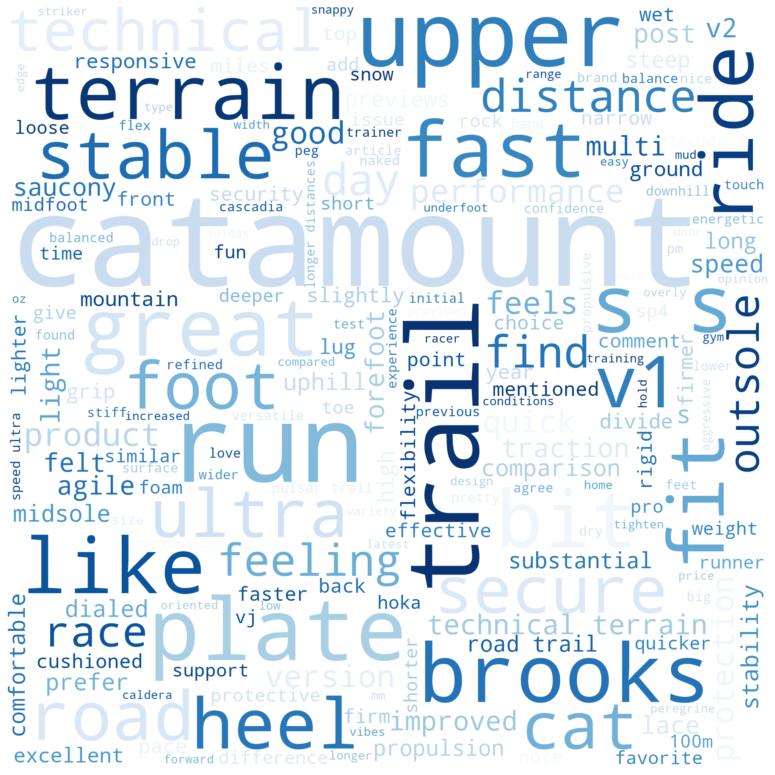

In [88]:
# Create list of strings
temp_txt = ', '.join(toks)

# Generate a word cloud
wordcloud = WordCloud(width=1800, height=1800, background_color='white', colormap='Blues', stopwords=set()).generate(temp_txt)

# Plot the word cloud
plt.figure(figsize=(14, 14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('brooks_catamount_2.png', dpi=100)
plt.show()
# plt.savefig('brooks_catamount_2.png')